# 5. Deep Learning for Computer Vision

## Training a Convnet from Scratch on a Small Dataset

In [1]:
from tensorflow import keras

from chap05preprocessing import run_ingest

import pandas as pd
import matplotlib.pyplot as plt

As a practical example for using convnets, we shall consider the **dogs-vs-cats** problem. Given an image, we have to classify it to be either a dog or a cat. 

We will first start tackling the problem by naïvely training a small convnet on the training set with no regularisation to obtain a baseline model. Then, we will introduce <b>data augmentation</b> to improve the model performance.

Afterwhich, we will look at more essential techniques, in particular <b>feature extraction with a pretrained network</b> and <b>fine-tuning a pretrained network</b>. Together, these strategies will constitute a toolbox for tackling image classification.

In [2]:
# Ingest
########
# run_ingest()

In [3]:
# Preprocessing
import os
HOME_DIR = os.path.dirname(os.path.abspath('__FILE__'))
WORKSPACE_DIR = os.path.join(HOME_DIR, 'workspace')

train_dir = os.path.join(WORKSPACE_DIR, 'train')
validation_dir = os.path.join(WORKSPACE_DIR, 'validation')
test_dir = os.path.join(WORKSPACE_DIR, 'test')

train_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
test_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150),
                                                   batch_size=20, class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Building the network follows the simple workflow. Build the model, and tune the model.

In [4]:
# Instantiate Model
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [5]:
# For testing
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [6]:
# Compile model
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [7]:
# Train
# history = model.fit(train_generator, steps_per_epoch=100, epochs=30,
#          validation_data=validation_generator, validation_steps=50)
# Note: Training took 1h

Epoch 1/30
 43/100 [===========>..................] - ETA: 42s - loss: 0.6934 - accuracy: 0.5081

/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  " Skipping tag %s" % (size, len(data), tag)
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  " Skipping tag %s" % (size, len(data), tag)
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  " Skipping tag %s" % (size, len(data), tag)
/Users/bryanlim/.pyenv/versions/3.7.2/envs/botanic/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:770: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  " Skipping tag %s" % (size,

100/100 [==============================] - 87s 872ms/step - loss: 0.6875 - accuracy: 0.5330 - val_loss: 0.6684 - val_accuracy: 0.6080
Epoch 2/30
100/100 [==============================] - 114s 1s/step - loss: 0.6492 - accuracy: 0.6150 - val_loss: 0.6766 - val_accuracy: 0.5730
Epoch 3/30
100/100 [==============================] - 102s 1s/step - loss: 0.6122 - accuracy: 0.6690 - val_loss: 0.6410 - val_accuracy: 0.6110
Epoch 4/30
100/100 [==============================] - 108s 1s/step - loss: 0.5830 - accuracy: 0.7020 - val_loss: 0.6137 - val_accuracy: 0.6530
Epoch 5/30
100/100 [==============================] - 109s 1s/step - loss: 0.5420 - accuracy: 0.7305 - val_loss: 0.5809 - val_accuracy: 0.7030
Epoch 6/30
100/100 [==============================] - 109s 1s/step - loss: 0.5131 - accuracy: 0.7490 - val_loss: 0.6364 - val_accuracy: 0.6420
Epoch 7/30
100/100 [==============================] - 110s 1s/step - loss: 0.4872 - accuracy: 0.7730 - val_loss: 0.5974 - val_accuracy: 0.7040
Epoch 8/

In [18]:
# Save model
model.save('model_ex2v0__baseline.h5')

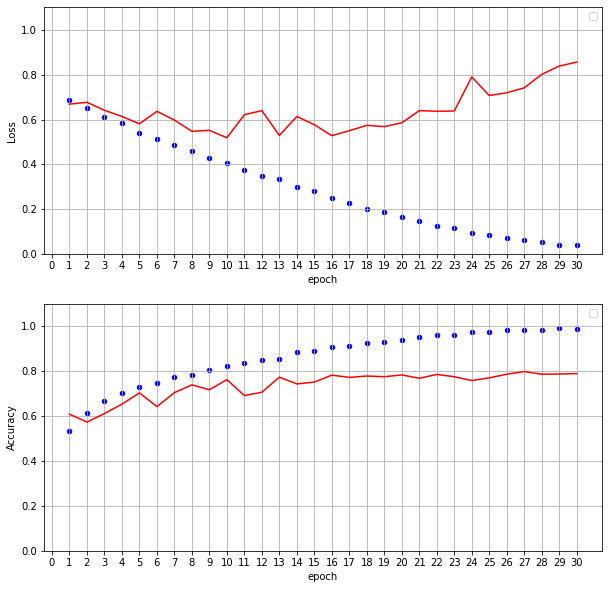

In [22]:
import warnings
warnings.filterwarnings("ignore")

metrics_df = pd.DataFrame(history.history)
metrics_df['epoch'] = metrics_df.index+1

fig = plt.figure(figsize=(10,10))
ax1, ax2 = fig.add_subplot(2,1,1), fig.add_subplot(2,1,2)
metrics_df.plot(kind='scatter', x='epoch', y='loss', ax=ax1, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_loss', ax=ax1, label='validation', color='red',)
ax1.set_ylabel("Loss")
ax1.grid('GAINSBORO')
ax1.legend([])
ax1.set_ylim(0,1.1)
ax1.set_xticks(range(0,31))

metrics_df.plot(kind='scatter', x='epoch', y='accuracy', ax=ax2, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_accuracy', ax=ax2, label='validation', color='red',)
ax2.set_ylabel("Accuracy")
ax2.grid('GAINSBORO')
ax2.set_xticks(range(0,31))
ax2.legend([])
ax2.set_ylim(0,1.1)
plt.show()

### Data Augmentation

Data augmentation takes the approach of generating more training data from existing training samples, by <b>agumenting</b> the samples via a number of random transformations that yield believeable-looking images. This will never let the model see the same image twice. This helps expose the model to more aspects of the data and generalize better.

It can be done by the `ImageDataGenerator`.

In [31]:
train_datagen2 = keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, # 0 - 180 degrees to randomly rotate
    width_shift_range=0.2,  # ranges (as a fraction of total width/height)
    height_shift_range=0.2, # to randomly translate pictures horizontally / vertically
    shear_range=0.2, # randomly apply shearing transformations
    zoom_range=0.2, # randomly zooming inside pictures
    horizontal_flip = True, # randomly flipping the images
    fill_mode='nearest' # strategy used for filling in newly created pixels, which can appear after any transformation
)
train_generator2 = train_datagen2.flow_from_directory(train_dir, target_size=(150, 150),
                                                      batch_size=32, class_mode='binary')

Found 2000 images belonging to 2 classes.


Another way to fight overfitting, we add a `Dropout` layer to the model, before the densely connected classifier.

In [25]:
# Instantiate model2
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(64, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Conv2D(128, (3,3), activation='relu'))
model2.add(keras.layers.MaxPooling2D(2,2))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dropout(0.5))
model2.add(keras.layers.Dense(512, activation='relu'))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [26]:
# Compile model
model2.compile(optimizer=keras.optimizers.RMSprop(learning_rate=1e-4), 
              loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
# Train
history2 = model2.fit(train_generator2, steps_per_epoch=50, 
                     epochs=50, validation_data=validation_generator, 
                     validation_steps=50)

Epoch 1/50
50/50 [==============================] - 54s 1s/step - loss: 0.6773 - accuracy: 0.5644 - val_loss: 0.6727 - val_accuracy: 0.5840
Epoch 2/50
50/50 [==============================] - 59s 1s/step - loss: 0.6735 - accuracy: 0.5612 - val_loss: 0.7067 - val_accuracy: 0.5160
Epoch 3/50
50/50 [==============================] - 232s 5s/step - loss: 0.6628 - accuracy: 0.6056 - val_loss: 0.7045 - val_accuracy: 0.5320
Epoch 4/50
50/50 [==============================] - 66s 1s/step - loss: 0.6538 - accuracy: 0.6086 - val_loss: 0.6386 - val_accuracy: 0.6250
Epoch 5/50
50/50 [==============================] - 131s 3s/step - loss: 0.6466 - accuracy: 0.6124 - val_loss: 0.6257 - val_accuracy: 0.6360
Epoch 6/50
50/50 [==============================] - 82s 2s/step - loss: 0.6357 - accuracy: 0.6356 - val_loss: 0.6415 - val_accuracy: 0.6210
Epoch 7/50
50/50 [==============================] - 96s 2s/step - loss: 0.6291 - accuracy: 0.6363 - val_loss: 0.5990 - val_accuracy: 0.6820
Epoch 8/50
50/50 [

In [28]:
# Save model
model2.save('model_ex2v1__augmentaion_dropout.h5')

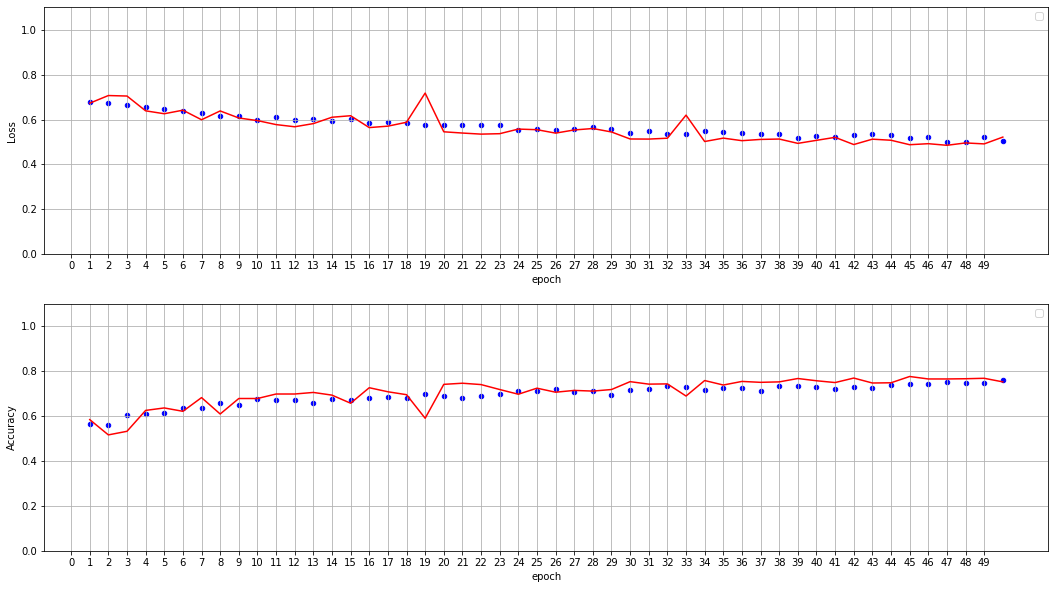

In [34]:
metrics_df = pd.DataFrame(history2.history)
metrics_df['epoch'] = metrics_df.index+1

fig = plt.figure(figsize=(18,10))
ax1, ax2 = fig.add_subplot(2,1,1), fig.add_subplot(2,1,2)
metrics_df.plot(kind='scatter', x='epoch', y='loss', ax=ax1, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_loss', ax=ax1, label='validation', color='red',)
ax1.set_ylabel("Loss")
ax1.grid('GAINSBORO')
ax1.legend([])
ax1.set_ylim(0,1.1)
ax1.set_xticks(range(0,50))

metrics_df.plot(kind='scatter', x='epoch', y='accuracy', ax=ax2, label='train', color='blue')
metrics_df.plot(kind='line', x='epoch', y='val_accuracy', ax=ax2, label='validation', color='red',)
ax2.set_ylabel("Accuracy")
ax2.grid('GAINSBORO')
ax2.set_xticks(range(0,50))
ax2.legend([])
ax2.set_ylim(0,1.1)
plt.show()

Additional References / Resources:

(1) - https://github.com/lutzroeder/Netron

(2) - https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip